Source : https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic/

# 1. Introduction

데이터를 분석 할 때는 가장 크게 3가지로 나눈다.  
- Feature Engineering 
- MIssing Value Imputation
- Prediction

첫번째로 데이터 내부를 분석하여 가장 영향력이 있는 Feature들을 뽑아내는 것이다.  


두번째로는 중간에 비어있는 value들을 mean 값으로 채우거나,  
바로 윗줄의 값과 duplicate를 해줄 수도 있다.  


위에서 모든 데이터 전처리가 끝났으면  
예측 알고리즘을 돌려서 우리가 뽑은 Feature들이 어떤 결과를 주는지를 확인 한다. 

Column, Features, Parameter(딥러닝에서 쓰는 용어랑 다르다), Attributes 다 같은 뜻으로 쓰인다.

## 1.1 Load and check data

In [1]:
# Load packages
library('ggplot2') # visualization
library('ggthemes') # visualization
library('scales') # visualization
library('dplyr') # data manipulation
library('mice') # imputation
library('randomForest') # classification algorithm 

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'ggthemes' was built under R version 3.4.1"Warning message:
"package 'dplyr' was built under R version 3.3.3"Warning message:
"Installed Rcpp (0.12.8) different from Rcpp used to build dplyr (0.12.12).
Please reinstall dplyr to avoid random crashes or undefined behavior."
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'mice' was built under R version 3.3.3"Warning message:
"package 'randomForest' was built under R version 3.3.3"randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [2]:
train <- read.csv('data/train.csv', stringsAsFactors = F)
test  <- read.csv('data/test.csv', stringsAsFactors = F)

# full  <- bind_rows(c(train, test)) # bind training & test data

# # check data
# str(full)

# 2 Feature Engineering

## 2.1 What’s in a name?

각 사람들의 Title 들을 볼 것이다.

In [3]:
train$Name

[1] "Braund, Mr. Owen Harris"                                                           
  [2] "Cumings, Mrs. John Bradley (Florence Briggs Thayer)"                               
  [3] "Heikkinen, Miss. Laina"                                                            
  [4] "Futrelle, Mrs. Jacques Heath (Lily May Peel)"                                      
  [5] "Allen, Mr. William Henry"                                                          
  [6] "Moran, Mr. James"                                                                  
  [7] "McCarthy, Mr. Timothy J"                                                           
  [8] "Palsson, Master. Gosta Leonard"                                                    
  [9] "Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"                                 
 [10] "Nasser, Mrs. Nicholas (Adele Achem)"                                               
 [11] "Sandstrom, Miss. Marguerite Rut"                                                   
 [12] "Bonnell, Miss. Elizabeth"                                                          
 [13] "Saundercock, Mr. William Henry"                                                    
 [14] "Andersson, Mr. Anders Johan"                                                       
 [15] "Vestrom, Miss. Hulda Amanda Adolfina"                                              
 [16] "Hewlett, Mrs. (Mary D Kingcome) "                                                  
 [17] "Rice, Master. Eugene"                                                              
 [18] "Williams, Mr. Charles Eugene"                                                      
 [19] "Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)"                           
 [20] "Masselmani, Mrs. Fatima"                                                           
 [21] "Fynney, Mr. Joseph J"                                                              
 [22] "Beesley, Mr. Lawrence"                                                             
 [23] "McGowan, Miss. Anna \"Annie\""                                                     
 [24] "Sloper, Mr. William Thompson"                                                      
 [25] "Palsson, Miss. Torborg Danira"                                                     
 [26] "Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)"                         
 [27] "Emir, Mr. Farred Chehab"                                                           
 [28] "Fortune, Mr. Charles Alexander"                                                    
 [29] "O'Dwyer, Miss. Ellen \"Nellie\""                                                   
 [30] "Todoroff, Mr. Lalio"                                                               
 [31] "Uruchurtu, Don. Manuel E"                                                          
 [32] "Spencer, Mrs. William Augustus (Marie Eugenie)"                                    
 [33] "Glynn, Miss. Mary Agatha"                                                          
 [34] "Wheadon, Mr. Edward H"                                                             
 [35] "Meyer, Mr. Edgar Joseph"                                                           
 [36] "Holverson, Mr. Alexander Oskar"                                                    
 [37] "Mamee, Mr. Hanna"                                                                  
 [38] "Cann, Mr. Ernest Charles"                                                          
 [39] "Vander Planke, Miss. Augusta Maria"                                                
 [40] "Nicola-Yarred, Miss. Jamila"                                                       
 [41] "Ahlin, Mrs. Johan (Johanna Persdotter Larsson)"                                    
 [42] "Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)"                          
 [43] "Kraeff, Mr. Theodor"                                                               
 [44] "Laroche, Miss. Simonne Marie Anne Andree"                                         

In [4]:
gsub('(\\..*)', '', train$Name)

[1] "Braund, Mr"                 "Cumings, Mrs"              
  [3] "Heikkinen, Miss"            "Futrelle, Mrs"             
  [5] "Allen, Mr"                  "Moran, Mr"                 
  [7] "McCarthy, Mr"               "Palsson, Master"           
  [9] "Johnson, Mrs"               "Nasser, Mrs"               
 [11] "Sandstrom, Miss"            "Bonnell, Miss"             
 [13] "Saundercock, Mr"            "Andersson, Mr"             
 [15] "Vestrom, Miss"              "Hewlett, Mrs"              
 [17] "Rice, Master"               "Williams, Mr"              
 [19] "Vander Planke, Mrs"         "Masselmani, Mrs"           
 [21] "Fynney, Mr"                 "Beesley, Mr"               
 [23] "McGowan, Miss"              "Sloper, Mr"                
 [25] "Palsson, Miss"              "Asplund, Mrs"              
 [27] "Emir, Mr"                   "Fortune, Mr"               
 [29] "O'Dwyer, Miss"              "Todoroff, Mr"              
 [31] "Uruchurtu, Don"             "Spencer, Mrs"              
 [33] "Glynn, Miss"                "Wheadon, Mr"               
 [35] "Meyer, Mr"                  "Holverson, Mr"             
 [37] "Mamee, Mr"                  "Cann, Mr"                  
 [39] "Vander Planke, Miss"        "Nicola-Yarred, Miss"       
 [41] "Ahlin, Mrs"                 "Turpin, Mrs"               
 [43] "Kraeff, Mr"                 "Laroche, Miss"             
 [45] "Devaney, Miss"              "Rogers, Mr"                
 [47] "Lennon, Mr"                 "O'Driscoll, Miss"          
 [49] "Samaan, Mr"                 "Arnold-Franchi, Mrs"       
 [51] "Panula, Master"             "Nosworthy, Mr"             
 [53] "Harper, Mrs"                "Faunthorpe, Mrs"           
 [55] "Ostby, Mr"                  "Woolner, Mr"               
 [57] "Rugg, Miss"                 "Novel, Mr"                 
 [59] "West, Miss"                 "Goodwin, Master"           
 [61] "Sirayanian, Mr"             "Icard, Miss"               
 [63] "Harris, Mr"                 "Skoog, Master"             
 [65] "Stewart, Mr"                "Moubarek, Master"          
 [67] "Nye, Mrs"                   "Crease, Mr"                
 [69] "Andersson, Miss"            "Kink, Mr"                  
 [71] "Jenkin, Mr"                 "Goodwin, Miss"             
 [73] "Hood, Mr"                   "Chronopoulos, Mr"          
 [75] "Bing, Mr"                   "Moen, Mr"                  
 [77] "Staneff, Mr"                "Moutal, Mr"                
 [79] "Caldwell, Master"           "Dowdell, Miss"             
 [81] "Waelens, Mr"                "Sheerlinck, Mr"            
 [83] "McDermott, Miss"            "Carrau, Mr"                
 [85] "Ilett, Miss"                "Backstrom, Mrs"            
 [87] "Ford, Mr"                   "Slocovski, Mr"             
 [89] "Fortune, Miss"              "Celotti, Mr"               
 [91] "Christmann, Mr"             "Andreasson, Mr"            
 [93] "Chaffee, Mr"                "Dean, Mr"                  
 [95] "Coxon, Mr"                  "Shorney, Mr"               
 [97] "Goldschmidt, Mr"            "Greenfield, Mr"            
 [99] "Doling, Mrs"                "Kantor, Mr"                
[101] "Petranec, Miss"             "Petroff, Mr"               
[103] "White, Mr"                  "Johansson, Mr"             
[105] "Gustafsson, Mr"             "Mionoff, Mr"               
[107] "Salkjelsvik, Miss"          "Moss, Mr"                  
[109] "Rekic, Mr"                  "Moran, Miss"               
[111] "Porter, Mr"                 "Zabour, Miss"              
[113] "Barton, Mr"                 "Jussila, Miss"             
[115] "Attalah, Miss"              "Pekoniemi, Mr"             
[117] "Connors, Mr"                "Turpin, Mr"                
[119] "Baxter, Mr"                 "Andersson, Miss"           
[121] "Hickman, Mr"                "Moore, Mr"                 
[123] "Nasser, Mr"                 "Webber, Miss"              
[125] "White, Mr"                 

In [5]:
gsub('(.*, )|(\\..*)', '', train$Name)

[1] "Mr"           "Mrs"          "Miss"         "Mrs"          "Mr"          
  [6] "Mr"           "Mr"           "Master"       "Mrs"          "Mrs"         
 [11] "Miss"         "Miss"         "Mr"           "Mr"           "Miss"        
 [16] "Mrs"          "Master"       "Mr"           "Mrs"          "Mrs"         
 [21] "Mr"           "Mr"           "Miss"         "Mr"           "Miss"        
 [26] "Mrs"          "Mr"           "Mr"           "Miss"         "Mr"          
 [31] "Don"          "Mrs"          "Miss"         "Mr"           "Mr"          
 [36] "Mr"           "Mr"           "Mr"           "Miss"         "Miss"        
 [41] "Mrs"          "Mrs"          "Mr"           "Miss"         "Miss"        
 [46] "Mr"           "Mr"           "Miss"         "Mr"           "Mrs"         
 [51] "Master"       "Mr"           "Mrs"          "Mrs"          "Mr"          
 [56] "Mr"           "Miss"         "Mr"           "Miss"         "Master"      
 [61] "Mr"           "Miss"         "Mr"           "Master"       "Mr"          
 [66] "Master"       "Mrs"          "Mr"           "Miss"         "Mr"          
 [71] "Mr"           "Miss"         "Mr"           "Mr"           "Mr"          
 [76] "Mr"           "Mr"           "Mr"           "Master"       "Miss"        
 [81] "Mr"           "Mr"           "Miss"         "Mr"           "Miss"        
 [86] "Mrs"          "Mr"           "Mr"           "Miss"         "Mr"          
 [91] "Mr"           "Mr"           "Mr"           "Mr"           "Mr"          
 [96] "Mr"           "Mr"           "Mr"           "Mrs"          "Mr"          
[101] "Miss"         "Mr"           "Mr"           "Mr"           "Mr"          
[106] "Mr"           "Miss"         "Mr"           "Mr"           "Miss"        
[111] "Mr"           "Miss"         "Mr"           "Miss"         "Miss"        
[116] "Mr"           "Mr"           "Mr"           "Mr"           "Miss"        
[121] "Mr"           "Mr"           "Mr"           "Miss"         "Mr"          
[126] "Master"       "Mr"           "Mr"           "Miss"         "Mr"          
[131] "Mr"           "Mr"           "Mrs"          "Mrs"          "Mr"          
[136] "Mr"           "Miss"         "Mr"           "Mr"           "Mr"          
[141] "Mrs"          "Miss"         "Mrs"          "Mr"           "Mr"          
[146] "Mr"           "Mr"           "Miss"         "Mr"           "Rev"         
[151] "Rev"          "Mrs"          "Mr"           "Mr"           "Mr"          
[156] "Mr"           "Miss"         "Mr"           "Mr"           "Master"      
[161] "Mr"           "Mrs"          "Mr"           "Mr"           "Master"      
[166] "Master"       "Mrs"          "Mrs"          "Mr"           "Mr"          
[171] "Mr"           "Master"       "Miss"         "Mr"           "Mr"          
[176] "Mr"           "Master"       "Miss"         "Mr"           "Mr"          
[181] "Miss"         "Mr"           "Master"       "Master"       "Miss"        
[186] "Mr"           "Mrs"          "Mr"           "Mr"           "Mr"          
[191] "Mrs"          "Mr"           "Miss"         "Master"       "Mrs"         
[196] "Miss"         "Mr"           "Mr"           "Miss"         "Miss"        
[201] "Mr"           "Mr"           "Mr"           "Mr"           "Mr"          
[206] "Miss"         "Mr"           "Mr"           "Miss"         "Mr"          
[211] "Mr"           "Miss"         "Mr"           "Mr"           "Mr"          
[216] "Miss"         "Miss"         "Mr"           "Miss"         "Mr"          
[221] "Mr"           "Mr"           "Mr"           "Mr"           "Mr"          
[226] "Mr"           "Mr"           "Mr"           "Mr"           "Miss"        
[231] "Mrs"          "Mr"           "Mr"           "Miss"         "Mr"          
[236] "Miss"         "Mr"           "Miss"         "Mr"           "Mr"          
[241] "Miss"         "Miss"         "Mr"           "Mr"           "Mr"          
[246] "Dr"           "Miss"      

테이블을 보면 Title이라는 Column은 볼 수 없지만, 아래와 같이 Title을 적고서 새로운 Value들을 넣어주면  
자연스럽게 새로운 Title의 라는 Column과 해당 되는 Value들을 볼 수 있다. 

In [6]:
train$Title <- gsub('(.*, )|(\\..*)', '', train$Name)

table() 이라는 함수를 쓰면 두 연관 되어있는 값들을 테이블로 보여준다. 

In [7]:
table(train$Sex, train$Title)

        
         Capt Col Don  Dr Jonkheer Lady Major Master Miss Mlle Mme  Mr Mrs  Ms
  female    0   0   0   1        0    1     0      0  182    2   1   0 125   1
  male      1   2   1   6        1    0     2     40    0    0   0 517   0   0
        
         Rev Sir the Countess
  female   0   0            1
  male     6   1            0

위에 테이블을 보면 Mr, Mrs, Master 같은 Title들은 흔히 알고 있는 Title이지만,  
Dona, Lady 같은 Title들은 흔하지 않은 것을 볼 수 있다.  
데이터를 깔끔하게 정리하기 위해 이런 Title들은 흔한 Title들로 덮어씌우도록 한다. 

In [8]:
# Titles with very low cell counts to be combined to "rare" level
rare_title <- c('Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer')

# Also reassign mlle, ms, and mme accordingly
train$Title[train$Title == 'Mlle']        <- 'Miss' 
train$Title[train$Title == 'Ms']          <- 'Miss'
train$Title[train$Title == 'Mme']         <- 'Mrs' 
train$Title[train$Title %in% rare_title]  <- 'Rare Title'

# Show title counts by sex again
table(train$Sex, train$Title)

        
         Master Miss  Mr Mrs Rare Title
  female      0  185   0 126          3
  male       40    0 517   0         20

In [9]:
# 마지막으로 이름으로부터 성들을 가져온다. 
# 가족이 있는지 없는지를 확인하기 위한 작업이다. 
train$Surname <- sapply(train$Name,  
                      function(x) strsplit(x, split = '[,.]')[[1]][1])

In [10]:
cat(paste('We have', nlevels(factor(train$Surname)), 'unique surnames. I would be interested to infer ethnicity based on surname --- another time.'))

We have 667 unique surnames. I would be interested to infer ethnicity based on surname --- another time.

# 2.2 Do families sink or swim together?

Now that we’ve taken care of splitting passenger name into some new variables, we can take it a step further and make some new family variables. First we’re going to make a family size variable based on number of siblings/spouse(s) (maybe someone has more than one spouse?) and number of children/parents.

In [11]:
# Create a family size variable including the passenger themselves
train$Fsize <- train$SibSp + train$Parch + 1

# Create a family variable 
train$Family <- paste(train$Surname, train$Fsize, sep='_')

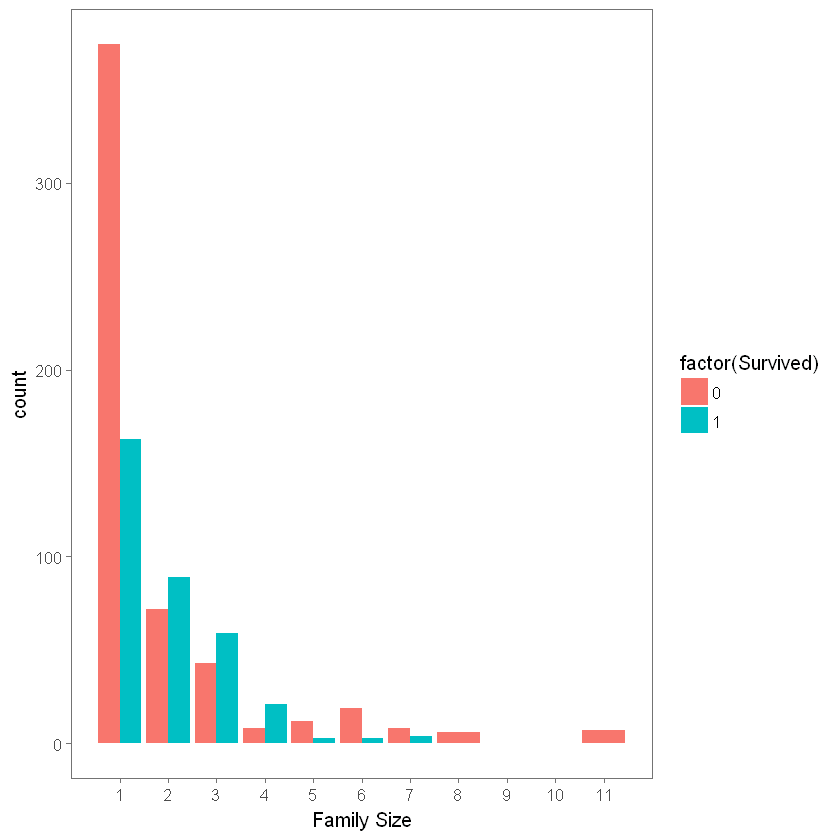

In [12]:
# Use ggplot2 to visualize the relationship between family size & survival
ggplot(full[1:891,], aes(x = Fsize, fill = factor(Survived))) +
  geom_bar(stat='count', position='dodge') +
  scale_x_continuous(breaks=c(1:11)) +
  labs(x = 'Family Size') +
  theme_few()

Ah hah. We can see that there’s a survival penalty to singletons and those with family sizes above 4. We can collapse this variable into three levels which will be helpful since there are comparatively fewer large families. Let’s create a discretized family size variable.

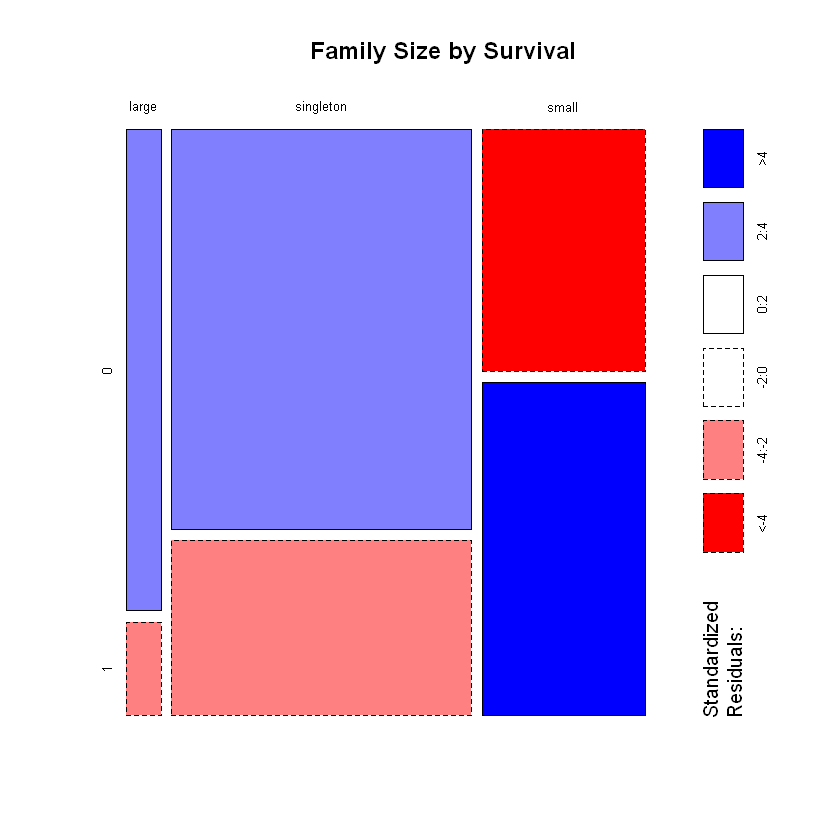

In [14]:
# Discretize family size
train$FsizeD[train$Fsize == 1] <- 'singleton'
train$FsizeD[train$Fsize < 5 & train$Fsize > 1] <- 'small'
train$FsizeD[train$Fsize > 4] <- 'large'

# Show family size by survival using a mosaic plot
mosaicplot(table(train$FsizeD, train$Survived), main='Family Size by Survival', shade=TRUE)

The mosaic plot shows that we preserve our rule that there’s a survival penalty among singletons and large families, but a benefit for passengers in small families. I want to do something further with our age variable, but 263 rows have missing age values, so we will have to wait until after we address missingness.

# 2.3 Treat a few more variables …

What’s left? There’s probably some potentially useful information in the **passenger cabin** variable including about their **deck**. Let’s take a look.

In [15]:
# This variable appears to have a lot of missing values
train$Cabin[1:28]

[1] ""            "C85"         ""            "C123"        ""           
 [6] ""            "E46"         ""            ""            ""           
[11] "G6"          "C103"        ""            ""            ""           
[16] ""            ""            ""            ""            ""           
[21] ""            "D56"         ""            "A6"          ""           
[26] ""            ""            "C23 C25 C27"

In [16]:
# The first character is the deck. For example:
strsplit(train$Cabin[2], NULL)[[1]]

[1] "C" "8" "5"